In [2]:
# Numerical Integration using finite differences
import math
import random
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In our previous homework, we evaluated the function 
\begin{equation}
I(t) = I_{peak} \exp(-\tau t)
\end{equation}


We could also evaluate this by assuming we know the *change* in current with respect to time, which can be expressed as 
\begin{eqnarray} 
\ln(I(t)) &= \ln(I_p) -\tau t\\
\Rightarrow \frac{d\ln(I(t))}{dt} &=\frac{d}{dt} (\ln(I_p)-\tau t)\\
\frac{d\ln(I(t))}{dI(t)}\frac{d(I(t))}{dt} &= (0 -\tau)\\
\frac{1}{I(t)}\frac{d(I(t))}{dt} &= -\tau  \\
\frac{d(I(t))}{dt} &= -\tau I(t)   
\end{eqnarray}

We can approximate the last equation, as
\begin{equation}
\frac{\Delta I(t)}{\Delta t} \approx -\tau I(t)
\end{equation}
which can allow us to solve the problem as
\begin{eqnarray} 
\Delta I(t) &= -\tau I(t) \Delta t\\
\Rightarrow I(t_{now})-I(t_{last}) &= -\tau I(t_{last}) \Delta t\\
I(t_{now}) &= I(t_{last}) - \tau I(t_{last}) \Delta t  \\
\end{eqnarray}



I=0.500000 at t=0.250000
I=0.250000 at t=0.500000
I=0.125000 at t=0.750000
I=0.062500 at t=1.000000


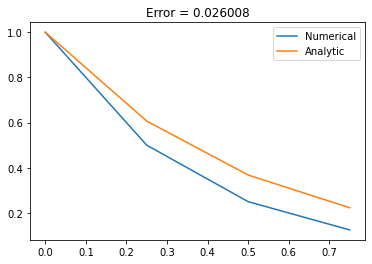

In [3]:
tau = 2 # [s]
peakCurrent = 1 # [C/s]
I0 = peakCurrent   # pC/s
time = 1 # s
dt  = 0.25 # 


# we'll stick the answers into an array with length time/dt
nSteps = np.int(time/dt)
Is = np.zeros( nSteps)
ts = np.zeros( nSteps ) 

# Numerically evaluate I(t) using dI/dt equation
ILast = I0
TLast = 0
for i in range (nSteps):
  # store 
  Is[i] = ILast
  ts[i] = TLast
  
  # fine new I
  TNow = TLast + dt
  INow = ILast - tau * dt * ILast
  # HIDE ME IF YOU HAVE LOTS OF POINTS 
  print("I=%f at t=%f"%(INow, TNow))

  # advance
  TLast = TNow
  ILast = INow

# compare with analytic solution
Itruth = np.exp(-tau * ts)
plt.plot(ts,Is,label="Numerical")
plt.plot(ts, Itruth, label="Analytic")
error = (np.sum(Is - Itruth)**2) / nSteps
plt.title("Error = %f"%error)
plt.legend(loc=0)

Ca integration example 

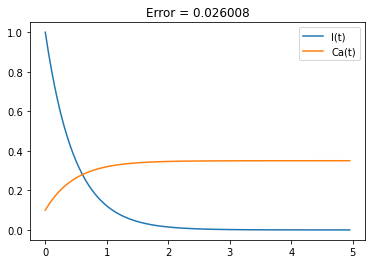

In [7]:
tau = 2 # [s]
peakCurrent = 1 # [C/s]
I0 = peakCurrent   # [pC/s] = [pA]
time = 5. # [s]
dt  = 0.05 # [s]
Ca=0.1 # [ uM ]
I_to_Ca = 0.5  # [pA/[uM/s]] converts channel current into intracellular Ca concentration 

# we'll stick the answers into an array with length time/dt
nSteps = np.int(time/dt)
Is = np.zeros( nSteps)
Cas = np.zeros( nSteps)
ts = np.zeros( nSteps ) 

# Numerically evaluate I(t) using dI/dt equation
ILast = I0
TLast = 0
CaLast = Ca
for i in range (nSteps):
  # store 
  Is[i] = ILast
  ts[i] = TLast
  Cas[i] = CaLast 

  # fine new I
  TNow = TLast + dt
  INow = ILast - tau * dt * ILast
  CaNow = CaLast + I_to_Ca * dt * ILast
  # HIDE ME IF YOU HAVE LOTS OF POINTS 
  #print("I=%f at t=%f"%(INow, TNow))

  # advance
  TLast = TNow
  ILast = INow
  CaLast = CaNow

# compare with analytic solution
Itruth = np.exp(-tau * ts)
plt.plot(ts,Is,label="I(t)")
plt.plot(ts, Cas, label="Ca(t)")
plt.title("Error = %f"%error)
plt.legend(loc=0)